# Ignition delay simulation of complete n-c10 RMG model without the low temperature pathways and sensitvity analysis 

In [1]:
import sys
sys.path.append('/scratch/ajulu.c/anaconda3/envs/rmg_py3')

In [2]:
!which python
# !conda list rmg_py3

/scratch/ajulu.c/anaconda3/envs/rmg_py3/bin/python


In [3]:
import cantera as ct
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

ct.__version__

'2.4.0'

In [4]:
from cantera import ck2cti

ck2cti.main([
    '--input=/scratch/ajulu.c/Code/GTL/nc10/nc10_lowT/no_lowT/chemkin/chem_annotated.inp',
    '--tran=/scratch/ajulu.c/Code/GTL/nc10/nc10_lowT/no_lowT/chemkin/tran.dat',
    '--output=/scratch/ajulu.c/Code/GTL/nc10/nc10_lowT/no_lowT/chemkin/chem.cti',
    '--permissive'])

Wrote CTI mechanism file to '/scratch/ajulu.c/Code/GTL/nc10/nc10_lowT/no_lowT/chemkin/chem.cti'.
Mechanism contains 331 species and 7380 reactions.
Validating mechanism...

**** WARNING ****
For species HOCHO(59), discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  -40.3604
	Value computed using high-temperature polynomial: -38.1678
PASSED.


In [5]:
gas = ct.Solution('/scratch/ajulu.c/Code/GTL/nc10/nc10_lowT/no_lowT/chemkin/chem.cti')



**** WARNING ****
For species HOCHO(59), discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  -40.3604
	Value computed using high-temperature polynomial: -38.1678


In [6]:
print(len(gas.species()), len(gas.reactions()))

331 7380


In [7]:
sorted(gas.species_names)

['Ar',
 'C(32)',
 'C2(52)',
 'C2H(4)',
 'C2H2(33)',
 'C2H2O(730)',
 'C2H3(31)',
 'C2H3CO(84)',
 'C2H3O2(46)',
 'C2H3O2(68)',
 'C2H3O2(98)',
 'C2H3O3(60)',
 'C2H3O3(74)',
 'C2H3O3(75)',
 'C2H3O3(94)',
 'C2H3O3(97)',
 'C2H4(11)',
 'C2H4(752)',
 'C2H4O(42)',
 'C2H4O2(64)',
 'C2H4O2(96)',
 'C2H4O3(67)',
 'C2H4O4(93)',
 'C2H5(30)',
 'C2H5CO(86)',
 'C2H5O(38)',
 'C2H5O(43)',
 'C2H5O(55)',
 'C2H5O(88)',
 'C2H5O2(39)',
 'C2H5O2(45)',
 'C2H5O2(63)',
 'C2H5O2(95)',
 'C2H5O3(56)',
 'C2H5O3(89)',
 'C2H5O3(91)',
 'C2H5O5(92)',
 'C2H6(36)',
 'C2H6O(54)',
 'C2H6O(87)',
 'C2H6O2(62)',
 'C2H6O3(90)',
 'C2O(53)',
 'C3H3(77)',
 'C3H4(174)',
 'C3H4O(83)',
 'C3H5(103)',
 'C3H5(109)',
 'C3H5(110)',
 'C3H5O(137)',
 'C3H5O(140)',
 'C3H5O(175)',
 'C3H5O(79)',
 'C3H5O2(80)',
 'C3H5O3(81)',
 'C3H6(12)',
 'C3H6(753)',
 'C3H6O(125)',
 'C3H6O(126)',
 'C3H6O(78)',
 'C3H6O(85)',
 'C3H6O3(82)',
 'C3H7O(187)',
 'C3H7O(188)',
 'C3H8(100)',
 'C4H2(118)',
 'C4H3(116)',
 'C4H4(121)',
 'C4H5(114)',
 'C4H5(115)',
 'C4H5(117)

In [8]:
for species in gas.species():
    if species.composition == {'C':10,'H':22}:
        print(species.name)

nC10H22(1)


In [9]:
species_names = {
    'nc10':'nC10H22(1)',
    'Ar':'Ar',
    'N2':'N2',
    'O2':'O2(2)',
    'O':'O(5)',
    'C2H':'C2H(4)',
    'OH':'OH(15)'
}

In [10]:
for s in species_names.values():
    assert s in gas.species_names, "{} not found".format(s)

In [11]:
gas.TP = 1000, 10e5
gas.set_equivalence_ratio(phi=1.0, fuel = species_names['nc10'], 
                          oxidizer = {species_names['O2']:0.21,
                                      species_names['N2']:0.79})
gas()


  gas:

       temperature            1000  K
          pressure           1e+06  Pa
           density         3.65228  kg/m^3
  mean mol. weight         30.3667  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy      7.2319e+05        2.196e+07     J
   internal energy      4.4938e+05        1.365e+07     J
           entropy          7490.6        2.275e+05     J/K
    Gibbs function     -6.7675e+06       -2.055e+08     J
 heat capacity c_p          1313.4        3.988e+04     J/K
 heat capacity c_v          1039.6        3.157e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                N2        0.77944         0.719038         -22.8116
        nC10H22(1)      0.0133673        0.0626331         -118.441
             O2(2)       0.207193         0.218329         -25.8365
     [ +328 minor]          

In [12]:
# def get_mole_fractions(phi):
#     """
#     The paper comparison comes from Titova et al. doi:10.1134/S0010508211020018 
#     Kinetic Mechanisms of n_Decane Oxidation compared n-decane mechanisms to shock tube experiments of 
#     D.C. Horning PhD Thesis of High-temperature auto-ignition and thermal decomposition of hydrocarbons
#     0.2% nc10 in 3.1%O2/Ar mixture
#     """
    

#     fraction_nc10 = 0.002
#     fraction_O2 = 15.5 * fraction_nc10 / phi
#     fraction_Ar = 1 - (fraction_nc10 + fraction_O2)
    
#     X = {species_names['nc10']:fraction_nc10,
#         species_names['O2']:fraction_O2,
#         species_names['Ar']:fraction_Ar}
    
#     return X
# gas.X = get_mole_fractions(phi=1.0)
# gas()

# This section computes the OH sensitivity of the first 20 reactions 

In [13]:
def get_sensitivities(gas, TPX, max_n=None):
    """
    Get sensitivity of OH with respect to k for the first max_n reactions.
    """
    gas.TPX = TPX
    reactor = ct.IdealGasReactor(gas)
    reactor_network = ct.ReactorNet([reactor])

    # number of reactions to consider
    if max_n is None:
        global n_sens
        n_sens = len(gas.reactions())
    else:
        n_sens = min(max_n, len(gas.reactions()))

    for i in range(n_sens):
        reactor.add_sensitivity_reaction(i)

    reactor_network.step()
    
    oh_sensitivities = np.zeros(n_sens)
    for i in range(n_sens):
        oh_sensitivities[i] = reactor_network.sensitivity(species_names['OH'], i)

    global ranking 
    
    ranking = list(reversed(np.argsort(np.abs(oh_sensitivities))))

    print(f"Top 20 sensitivities (of the first {n_sens} considered)")
    for i, j in enumerate(ranking[:20]):
        print(i, j,
              reactor_network.sensitivity_parameter_name(j), 
              oh_sensitivities[j]
             )
    
    return oh_sensitivities

## The ignition delay function is defined here with the sensitivity argument given as an option

In [14]:
def get_ignition_delay(gas, temperature, pressure_bar, mole_fractions, plot=False, sensitivity=False):
    """
    A general function to find the ignition delay.
    Using C2H + O --> CH* as the indication of ignition
    
    gas is a cantera Solution object
    temperature in K
    pressure_bar is in bar
    mole_fractions is a dict
    
    sensitivity is Boolean, whether to run sensitivity analysis
    """
    gas.TPX = temperature, pressure_bar*1e5, mole_fractions

    reactor = ct.IdealGasReactor(gas)
    reactor_network = ct.ReactorNet([reactor])
    
    time = 0.0
    end_time = 100e-3
    
    times = []
    concentrations = []
    pressures = []
    temperatures = []

    # set the tolerances for the solution and for the sensitivity coefficients
    reactor_network.rtol = 1.0e-6
    reactor_network.atol = 1.0e-16
    reactor_network.rtol_sensitivity = 1.0e-6
    reactor_network.atol_sensitivity = 1.0e-6
            
    print_data = True
    sensitivity_done = False
    while time < end_time:
        time = reactor_network.time
        times.append(time)
        temperatures.append(reactor.T)
        pressures.append(reactor.thermo.P)
        concentrations.append(reactor.thermo.concentrations)
        
        # take a timestep
        # the size of the step will be determined by the ODE solver
        # depending on how quickly things are changing.
        reactor_network.step()
        
        # Some timestep:
        if sensitivity and not sensitivity_done:
            if reactor.T > temperature + 100: # do it when T has risen 100K above start point
                global TPX_for_sensitivity
                TPX_for_sensitivity = gas.TPX
                global time_for_sensitivity
                time_for_sensitivity = time
                sensitivity_done = True # just do it once
        
    print("Reached end time {0:.2f} ms in {1} steps".format(times[-1]*1e3, len(times)))
    # convert the lists into arrays
    concentrations = np.array(concentrations)
    times = np.array(times)
    pressures = np.array(pressures)
    temperatures = np.array(temperatures)

    if plot:
        plt.subplot(2,1,1)
        plt.plot(times*1e3, pressures/1e5)
        plt.ylabel("Pressure (bar)", color='b')
        ax2 = plt.gca().twinx()
        ax2.set_ylabel('Temperature (K)', color='r')
        ax2.plot(times*1e3, temperatures, 'r')
    # Using C2H + O --> CH* as the indication of ignition
    i_c2h = gas.species_index(species_names['C2H'])   
    i_o = gas.species_index(species_names['O'])
    excited_ch_generation = concentrations[:,i_o] * concentrations[:,i_c2h]
    if plot:
        plt.subplot(2,1,2)
        plt.plot(times*1e3, excited_ch_generation, 'g')
        plt.ylabel("CH* emission")
        plt.ylim(0,max(1e-13,1.1*max(excited_ch_generation)))
        plt.xlabel("Time (ms)")
        plt.tight_layout()
        plt.show()
    step_with_highest_ch_gen = excited_ch_generation.argmax()
        
    if step_with_highest_ch_gen > 1 and excited_ch_generation.max()>1e-20:
        ignition_time_ms = 1e3 * times[step_with_highest_ch_gen]
        print("At {0} K {1} bar, ignition delay time is {2} ms".format(temperature, pressure_bar, ignition_time_ms))
    else:
        print("At {0} K {1} bar, no ignition detected".format(temperature, pressure_bar))
        ignition_time_ms = np.infty
    
    print(f"Performing sensitivity at time {time_for_sensitivity/1000} ms at {gas.T} K, {gas.P} Pa")
    print()
    get_sensitivities(gas, TPX_for_sensitivity)
    
    return ignition_time_ms

In [49]:
# def get_ignition_delay_ar(temperature, pressure_bar, phi, plot=False):
#     """
#     The paper comparison comes from Titova et al. doi:10.1134/S0010508211020018 
#     Kinetic Mechanisms of n_Decane Oxidation compared n-decane mechanisms to shock tube experiments of 
#     D.C. Horning PhD Thesis of High-temperature auto-ignition and thermal decomposition of hydrocarbons
#     0.2% nc10 in 3.1%O2/Ar mixture.
#     Ignition delay time condition is at P = 1.2 - 1.3 atm between 1400 - 1550 K
#     """
    
#     gas.TP = temperature, pressure_bar*1e5
    
#     mole_fractions = get_mole_fractions(phi)
    
#     if plot:
#         gas()
        
#     time = get_ignition_delay(gas, temperature, pressure_bar, mole_fractions, plot=plot)

#     return time
    


In [15]:
def get_ignition_delay_n2(temperature, pressure_bar, phi, plot=False,sensitivity=False):
    """
    The paper comparison comes from Pfahl et al and Zhukov et al. --> DOI: 10.1016/j.combustflame.2007.09.006 
    Autoignition of n_Decane at high pressure and self-ignition of diesel relevant hydro-carbon-ar mixtures under 
    engine relevant conditions; compared n-decane mechanisms to shock tube experiments of Zhukov and Pfahl respectively. 
    nc10 in air mixtures between phi = [0.5 1.0 2.0] for pressures at 13 and 50 bar
    Ignition delay time condition is at P = 13 - 50 bar between 666 - 1450 K
    """
    
    gas.TP = temperature, pressure_bar*1e5
    
    gas.set_equivalence_ratio(phi=phi, fuel = species_names['nc10'], 
                              oxidizer = {species_names['O2']:0.21,
                                      species_names['N2']:0.79})
                              
    mole_fractions = gas.X
                              
    if plot:
        gas()
        
    time = get_ignition_delay(gas, temperature, pressure_bar, mole_fractions, plot=plot, sensitivity=sensitivity)

    return time
    


  gas:

       temperature         700.001  K
          pressure         1.3e+06  Pa
           density         6.78279  kg/m^3
  mean mol. weight         30.3667  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy       3.439e+05        1.044e+07     J
   internal energy      1.5224e+05        4.623e+06     J
           entropy            6969        2.116e+05     J/K
    Gibbs function     -4.5344e+06       -1.377e+08     J
 heat capacity c_p          1210.4        3.676e+04     J/K
 heat capacity c_v          936.63        2.844e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                N2        0.77944         0.719038         -21.7187
        nC10H22(1)      0.0133673        0.0626331         -120.609
             O2(2)       0.207193         0.218329         -24.6997
     [ +328 minor]          

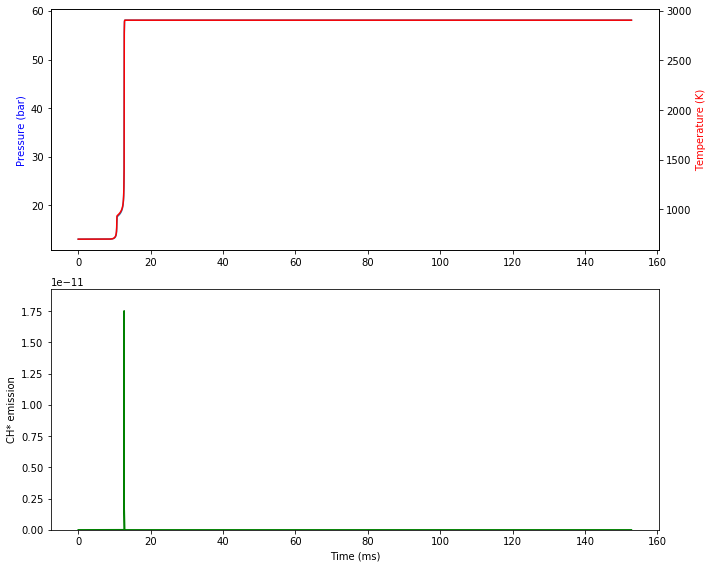

At 700.0007000007 K 13 bar, ignition delay time is 12.685595656489383 ms
Performing sensitivity at time 1.0604492370747684e-05 ms at 2904.0898239152452 K, 5809822.164128983 Pa

Top 20 sensitivities (of the first 7380 considered)
0 974 IdealGasReactor_10: OH(15) + nC10H22(1) <=> H2O(8) + S(692) -8.136721891428492e-05
1 1162 IdealGasReactor_10: S(1039) <=> OH(15) + S(1404) 3.428756274313044e-05
2 1830 IdealGasReactor_10: OH(15) + S(1299) <=> S(1306) 1.9917255727592218e-05
3 187 IdealGasReactor_10: CH3OO(28) + OH(15) <=> CH3OH(23) + O2(2) -1.8055628867767396e-05
4 1946 IdealGasReactor_10: OH(15) + S(1032) <=> S(1043) 1.7121891538516942e-05
5 53 IdealGasReactor_10: CH2O(9) + OH(15) <=> H2O(8) + HCO(20) -1.487209690620308e-05
6 2128 IdealGasReactor_10: OH(15) + S(1075) <=> S(1083) 1.1820972026939923e-05
7 1741 IdealGasReactor_10: OH(15) + S(1260) <=> S(1211) 1.1506880830974971e-05
8 1109 IdealGasReactor_10: S(1169) <=> S(1198) 1.1041352807071745e-05
9 442 IdealGasReactor_10: CH2CHO(40) + O2

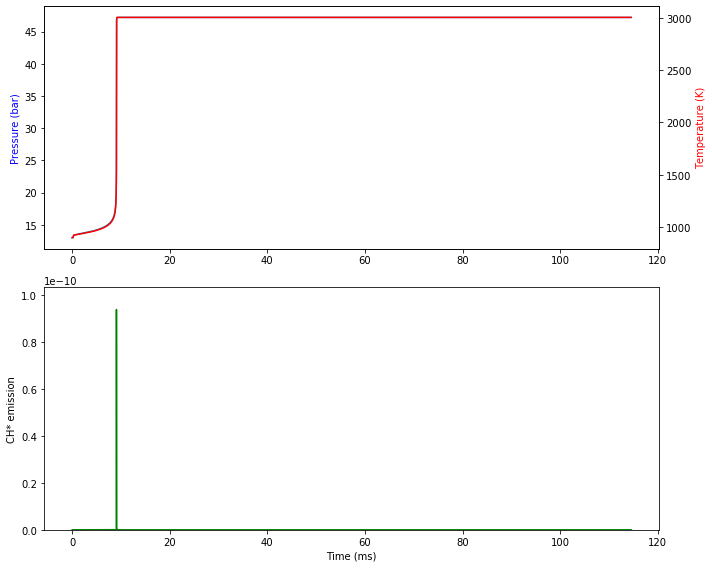

At 900.0090000900009 K 13 bar, ignition delay time is 9.076627827221763 ms
Performing sensitivity at time 6.683728568943964e-06 ms at 3003.5073510225257 K, 4718735.610095566 Pa

Top 20 sensitivities (of the first 7380 considered)
0 21 IdealGasReactor_12: H2O2(18) (+M) <=> 2 OH(15) (+M) 0.0003773474733882851
1 974 IdealGasReactor_12: OH(15) + nC10H22(1) <=> H2O(8) + S(692) -0.0001717620568622154
2 53 IdealGasReactor_12: CH2O(9) + OH(15) <=> H2O(8) + HCO(20) -0.00013290820128759265
3 2469 IdealGasReactor_12: C3H6(12) + OH(15) <=> C3H5(103) + H2O(8) -0.00010115042160551395
4 442 IdealGasReactor_12: CH2CHO(40) + O2(2) <=> CH2O(9) + CO(6) + OH(15) 4.8529724091949875e-05
5 1930 IdealGasReactor_12: S(227) <=> C4H8O(222) + OH(15) 4.567371115041876e-05
6 360 IdealGasReactor_12: CH3CHO(37) + OH(15) <=> CH2CHO(40) + H2O(8) -3.41702823084128e-05
7 240 IdealGasReactor_12: C2H4(11) + OH(15) <=> C2H3(31) + H2O(8) -3.247983534191891e-05
8 359 IdealGasReactor_12: CH3CHO(37) + OH(15) <=> CH3CO(57) + H2O

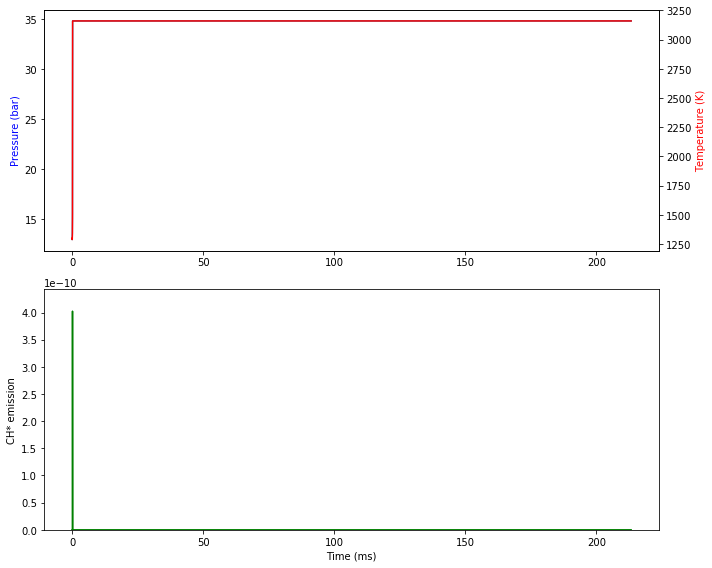

At 1300.0013000013 K 13 bar, ignition delay time is 0.13567198076368314 ms
Performing sensitivity at time 1.1159382829604961e-07 ms at 3160.4940302678733 K, 3484895.6133518117 Pa

Top 20 sensitivities (of the first 7380 considered)
0 21 IdealGasReactor_14: H2O2(18) (+M) <=> 2 OH(15) (+M) 0.0051451561606335044
1 240 IdealGasReactor_14: C2H4(11) + OH(15) <=> C2H3(31) + H2O(8) -0.0019532928636183298
2 2469 IdealGasReactor_14: C3H6(12) + OH(15) <=> C3H5(103) + H2O(8) -0.0018569819075495108
3 53 IdealGasReactor_14: CH2O(9) + OH(15) <=> H2O(8) + HCO(20) -0.0012479771886581815
4 0 IdealGasReactor_14: H(14) + O2(2) <=> O(5) + OH(15) 0.0012219680659805283
5 212 IdealGasReactor_14: C2H6(36) + OH(15) <=> C2H5(30) + H2O(8) -0.000565891084407117
6 89 IdealGasReactor_14: CH3(21) + O2(2) <=> CH2O(9) + OH(15) 0.0005608769084164655
7 3 IdealGasReactor_14: H2(13) + OH(15) <=> H(14) + H2O(8) -0.0004515754382988265
8 6006 IdealGasReactor_14: C3H6(12) + OH(15) <=> C3H5(110) + H2O(8) -0.00039463866147919065

In [18]:
low_T_initial_idt = get_ignition_delay_n2(1000/1.42857, 13, 1, plot=True, sensitivity=True)
plt.rcParams['figure.figsize'] = [10, 8]

medium_T_initial_idt = get_ignition_delay_n2(1000/1.1111, 13, 1, plot=True, sensitivity=True)
plt.rcParams['figure.figsize'] = [10, 8]

high_T_inital_idt = get_ignition_delay_n2(1000/0.76923, 13, 1, plot=True, sensitivity=True)
plt.rcParams['figure.figsize'] = [10, 8]

plt.show()

In [54]:
# Get the best of both ggplot and seaborn
plt.style.use('ggplot')
plt.style.use('seaborn-deep')

plt.rcParams['figure.autolayout'] = True
import pandas as pd

In [21]:
# Create a dataframe to store sensitivity-analysis data
sensitivities = pd.DataFrame(data=[], index=gas.reaction_equations(ranking[:20]))

In [22]:
# Create an empty column to store the sensitivities data
sensitivities["low_Temperature"] = ""
sensitivities["med_Temperature"] = ""
sensitivities["high_Temperature"] = ""

In [23]:
dk = 1e-1 #perturb the oh_sensitivities

for i, j in enumerate(ranking[:20]):
    print(gas.reaction(j))
    gas.set_multiplier(1.0+dk,j)
    print(f"Multiplying reaction {j} rate constant by {dk} in {gas.reaction(j)}")


    low_T_new_idt = get_ignition_delay_n2(1000/1.42857, 13, 1, plot=False, sensitivity=False)
    sensitivities["low_Temperature"][i] = (low_T_new_idt - low_T_initial_idt)/(low_T_initial_idt*dk)
    
    medium_T_new_idt = get_ignition_delay_n2(1000/1.1111, 13, 1, plot=False, sensitivity=False)
    sensitivities["med_Temperature"][i] = (medium_T_new_idt - medium_T_initial_idt)/(medium_T_initial_idt*dk)
    
    high_T_new_idt = get_ignition_delay_n2(1000/0.76923, 13, 1, plot=False, sensitivity=False)
    sensitivities["high_Temperature"][i] = (high_T_new_idt - high_T_inital_idt)/(high_T_inital_idt*dk)
    
    
gas.set_multiplier(1.0)

H2O2(18) (+M) <=> 2 OH(15) (+M)
Multiplying reaction 21 rate constant by 0.1 in H2O2(18) (+M) <=> 2 OH(15) (+M)
Reached end time 325.44 ms in 4036 steps
At 700.0007000007 K 13 bar, ignition delay time is 12.538955786214219 ms
Performing sensitivity at time 1.1159382829604961e-07 ms at 2904.0827752488754 K, 5809803.02121575 Pa

Top 20 sensitivities (of the first 7380 considered)
0 21 IdealGasReactor_18: H2O2(18) (+M) <=> 2 OH(15) (+M) 0.00016093004514886798
1 240 IdealGasReactor_18: C2H4(11) + OH(15) <=> C2H3(31) + H2O(8) -5.5562527513843534e-05
2 2469 IdealGasReactor_18: C3H6(12) + OH(15) <=> C3H5(103) + H2O(8) -5.279808956713565e-05
3 53 IdealGasReactor_18: CH2O(9) + OH(15) <=> H2O(8) + HCO(20) -3.548564242805037e-05
4 0 IdealGasReactor_18: H(14) + O2(2) <=> O(5) + OH(15) 3.465047925077825e-05
5 212 IdealGasReactor_18: C2H6(36) + OH(15) <=> C2H5(30) + H2O(8) -1.609032263635388e-05
6 89 IdealGasReactor_18: CH3(21) + O2(2) <=> CH2O(9) + OH(15) 1.5947054597944294e-05
7 3 IdealGasReactor_

Reached end time 119.10 ms in 3057 steps
At 900.0090000900009 K 13 bar, ignition delay time is 8.461609154881314 ms
Performing sensitivity at time 1.1159382829604961e-07 ms at 3003.532467512575 K, 4718793.376760976 Pa

Top 20 sensitivities (of the first 7380 considered)
0 21 IdealGasReactor_26: H2O2(18) (+M) <=> 2 OH(15) (+M) 0.0001381179255406339
1 240 IdealGasReactor_26: C2H4(11) + OH(15) <=> C2H3(31) + H2O(8) -5.2454790427827896e-05
2 2469 IdealGasReactor_26: C3H6(12) + OH(15) <=> C3H5(103) + H2O(8) -4.5313533747687905e-05
3 53 IdealGasReactor_26: CH2O(9) + OH(15) <=> H2O(8) + HCO(20) -3.0455265474784827e-05
4 0 IdealGasReactor_26: H(14) + O2(2) <=> O(5) + OH(15) 2.973837706922007e-05
5 212 IdealGasReactor_26: C2H6(36) + OH(15) <=> C2H5(30) + H2O(8) -1.3809391580129083e-05
6 89 IdealGasReactor_26: CH3(21) + O2(2) <=> CH2O(9) + OH(15) 1.3686525688082324e-05
7 3 IdealGasReactor_26: H2(13) + OH(15) <=> H(14) + H2O(8) -1.1042638498711873e-05
8 6006 IdealGasReactor_26: C3H6(12) + OH(15) 

Reached end time 195.72 ms in 2291 steps
At 1300.0013000013 K 13 bar, ignition delay time is 0.13394604167195534 ms
Performing sensitivity at time 1.1159382829604961e-07 ms at 3160.4902565316142 K, 3484888.9307488627 Pa

Top 20 sensitivities (of the first 7380 considered)
0 21 IdealGasReactor_34: H2O2(18) (+M) <=> 2 OH(15) (+M) 0.00013774944124453196
1 240 IdealGasReactor_34: C2H4(11) + OH(15) <=> C2H3(31) + H2O(8) -5.231460979444549e-05
2 2469 IdealGasReactor_34: C3H6(12) + OH(15) <=> C3H5(103) + H2O(8) -4.971167860331935e-05
3 53 IdealGasReactor_34: CH2O(9) + OH(15) <=> H2O(8) + HCO(20) -3.0373875788045243e-05
4 0 IdealGasReactor_34: H(14) + O2(2) <=> O(5) + OH(15) 2.9659032764163424e-05
5 212 IdealGasReactor_34: C2H6(36) + OH(15) <=> C2H5(30) + H2O(8) -1.3772486804693428e-05
6 89 IdealGasReactor_34: CH3(21) + O2(2) <=> CH2O(9) + OH(15) 1.3650011375906376e-05
7 3 IdealGasReactor_34: H2(13) + OH(15) <=> H(14) + H2O(8) -1.1013126701156019e-05
8 6006 IdealGasReactor_34: C3H6(12) + OH(15

Reached end time 216.55 ms in 4098 steps
At 700.0007000007 K 13 bar, ignition delay time is 12.51004501387681 ms
Performing sensitivity at time 1.1159382829604961e-07 ms at 2904.15397602403 K, 5810024.152092342 Pa

Top 20 sensitivities (of the first 7380 considered)
0 21 IdealGasReactor_42: H2O2(18) (+M) <=> 2 OH(15) (+M) 6.556660492515313e-05
1 240 IdealGasReactor_42: C2H4(11) + OH(15) <=> C2H3(31) + H2O(8) -2.490100321860105e-05
2 2469 IdealGasReactor_42: C3H6(12) + OH(15) <=> C3H5(103) + H2O(8) -2.3661913578168918e-05
3 53 IdealGasReactor_42: CH2O(9) + OH(15) <=> H2O(8) + HCO(20) -1.5903190898097443e-05
4 0 IdealGasReactor_42: H(14) + O2(2) <=> O(5) + OH(15) 1.5528338476835052e-05
5 212 IdealGasReactor_42: C2H6(36) + OH(15) <=> C2H5(30) + H2O(8) -6.555472479448472e-06
6 89 IdealGasReactor_42: CH3(21) + O2(2) <=> CH2O(9) + OH(15) 6.497186080871601e-06
7 3 IdealGasReactor_42: H2(13) + OH(15) <=> H(14) + H2O(8) -5.242194669315956e-06
8 6006 IdealGasReactor_42: C3H6(12) + OH(15) <=> C3H

Reached end time 119.70 ms in 3177 steps
At 900.0090000900009 K 13 bar, ignition delay time is 8.769253463146185 ms
Performing sensitivity at time 1.1159382829604961e-07 ms at 3003.5338314507094 K, 4718797.473329494 Pa

Top 20 sensitivities (of the first 7380 considered)
0 21 IdealGasReactor_50: H2O2(18) (+M) <=> 2 OH(15) (+M) 6.530460840533886e-05
1 240 IdealGasReactor_50: C2H4(11) + OH(15) <=> C2H3(31) + H2O(8) -2.4801485711950222e-05
2 2469 IdealGasReactor_50: C3H6(12) + OH(15) <=> C3H5(103) + H2O(8) -2.3567347620263578e-05
3 53 IdealGasReactor_50: CH2O(9) + OH(15) <=> H2O(8) + HCO(20) -1.5839633060021307e-05
4 0 IdealGasReactor_50: H(14) + O2(2) <=> O(5) + OH(15) 1.5466287333987103e-05
5 212 IdealGasReactor_50: C2H6(36) + OH(15) <=> C2H5(30) + H2O(8) -7.182200495429406e-06
6 89 IdealGasReactor_50: CH3(21) + O2(2) <=> CH2O(9) + OH(15) 6.471224052453545e-06
7 3 IdealGasReactor_50: H2(13) + OH(15) <=> H(14) + H2O(8) -5.221244391890152e-06
8 6006 IdealGasReactor_50: C3H6(12) + OH(15) <

Reached end time 200.52 ms in 2460 steps
At 1300.0013000013 K 13 bar, ignition delay time is 0.12469496303568602 ms
Performing sensitivity at time 1.1159382829604961e-07 ms at 3160.540232072895 K, 3484977.422537437 Pa

Top 20 sensitivities (of the first 7380 considered)
0 21 IdealGasReactor_58: H2O2(18) (+M) <=> 2 OH(15) (+M) 6.554759997760282e-05
1 240 IdealGasReactor_58: C2H4(11) + OH(15) <=> C2H3(31) + H2O(8) -2.4893785330085603e-05
2 2469 IdealGasReactor_58: C3H6(12) + OH(15) <=> C3H5(103) + H2O(8) -2.3655054834231837e-05
3 53 IdealGasReactor_58: CH2O(9) + OH(15) <=> H2O(8) + HCO(20) -1.5898581150278744e-05
4 0 IdealGasReactor_58: H(14) + O2(2) <=> O(5) + OH(15) 1.552383734252645e-05
5 212 IdealGasReactor_58: C2H6(36) + OH(15) <=> C2H5(30) + H2O(8) -7.2089294329611365e-06
6 89 IdealGasReactor_58: CH3(21) + O2(2) <=> CH2O(9) + OH(15) 7.144832659932155e-06
7 3 IdealGasReactor_58: H2(13) + OH(15) <=> H(14) + H2O(8) -5.240675193827519e-06
8 6006 IdealGasReactor_58: C3H6(12) + OH(15) <=

Reached end time 260.27 ms in 4115 steps
At 700.0007000007 K 13 bar, ignition delay time is 12.496929174088159 ms
Performing sensitivity at time 1.1159382829604961e-07 ms at 2904.1909316705705 K, 5810124.23812371 Pa

Top 20 sensitivities (of the first 7380 considered)
0 21 IdealGasReactor_66: H2O2(18) (+M) <=> 2 OH(15) (+M) 6.562196981823756e-05
1 240 IdealGasReactor_66: C2H4(11) + OH(15) <=> C2H3(31) + H2O(8) -2.492200503359666e-05
2 2469 IdealGasReactor_66: C3H6(12) + OH(15) <=> C3H5(103) + H2O(8) -2.3681870360992153e-05
3 53 IdealGasReactor_66: CH2O(9) + OH(15) <=> H2O(8) + HCO(20) -1.5916603954418826e-05
4 0 IdealGasReactor_66: H(14) + O2(2) <=> O(5) + OH(15) 1.5541463937757568e-05
5 212 IdealGasReactor_66: C2H6(36) + OH(15) <=> C2H5(30) + H2O(8) -7.217101544682019e-06
6 89 IdealGasReactor_66: CH3(21) + O2(2) <=> CH2O(9) + OH(15) 7.1529391477179735e-06
7 3 IdealGasReactor_66: H2(13) + OH(15) <=> H(14) + H2O(8) -5.771276661899419e-06
8 6006 IdealGasReactor_66: C3H6(12) + OH(15) <=> 

Reached end time 124.49 ms in 3253 steps
At 900.0090000900009 K 13 bar, ignition delay time is 8.37742233489422 ms
Performing sensitivity at time 1.1159382829604961e-07 ms at 3003.558509580307 K, 4718852.586266731 Pa

Top 20 sensitivities (of the first 7380 considered)
0 21 IdealGasReactor_74: H2O2(18) (+M) <=> 2 OH(15) (+M) 1.589411259258935e-05
1 240 IdealGasReactor_74: C2H4(11) + OH(15) <=> C2H3(31) + H2O(8) -6.036302444378843e-06
2 2469 IdealGasReactor_74: C3H6(12) + OH(15) <=> C3H5(103) + H2O(8) -5.735910298018087e-06
3 53 IdealGasReactor_74: CH2O(9) + OH(15) <=> H2O(8) + HCO(20) -3.855109472613383e-06
4 0 IdealGasReactor_74: H(14) + O2(2) <=> O(5) + OH(15) 3.7641728860097667e-06
5 212 IdealGasReactor_74: C2H6(36) + OH(15) <=> C2H5(30) + H2O(8) -1.7480316947983464e-06
6 89 IdealGasReactor_74: CH3(21) + O2(2) <=> CH2O(9) + OH(15) 1.7324918127933434e-06
7 3 IdealGasReactor_74: H2(13) + OH(15) <=> H(14) + H2O(8) -1.3978717222406426e-06
8 6006 IdealGasReactor_74: C3H6(12) + OH(15) <=>

Reached end time 100.98 ms in 2397 steps
At 1300.0013000013 K 13 bar, ignition delay time is 0.12596443637475846 ms
Performing sensitivity at time 1.1159382829604961e-07 ms at 3160.5469548898086 K, 3484989.3289647456 Pa

Top 20 sensitivities (of the first 7380 considered)
0 21 IdealGasReactor_82: H2O2(18) (+M) <=> 2 OH(15) (+M) 1.5895280028467912e-05
1 240 IdealGasReactor_82: C2H4(11) + OH(15) <=> C2H3(31) + H2O(8) -6.0367463500709635e-06
2 2469 IdealGasReactor_82: C3H6(12) + OH(15) <=> C3H5(103) + H2O(8) -5.736332118070762e-06
3 53 IdealGasReactor_82: CH2O(9) + OH(15) <=> H2O(8) + HCO(20) -3.855392974712533e-06
4 0 IdealGasReactor_82: H(14) + O2(2) <=> O(5) + OH(15) 3.764451337128225e-06
5 212 IdealGasReactor_82: C2H6(36) + OH(15) <=> C2H5(30) + H2O(8) -1.7481602450355232e-06
6 89 IdealGasReactor_82: CH3(21) + O2(2) <=> CH2O(9) + OH(15) 1.7326190632815274e-06
7 3 IdealGasReactor_82: H2(13) + OH(15) <=> H(14) + H2O(8) -1.3979745262433078e-06
8 6006 IdealGasReactor_82: C3H6(12) + OH(15)

Reached end time 190.24 ms in 4063 steps
At 700.0007000007 K 13 bar, ignition delay time is 12.406601781029703 ms
Performing sensitivity at time 1.1159382829604961e-07 ms at 2904.321402129806 K, 5810502.686810548 Pa

Top 20 sensitivities (of the first 7380 considered)
0 21 IdealGasReactor_90: H2O2(18) (+M) <=> 2 OH(15) (+M) 1.589007687608225e-05
1 240 IdealGasReactor_90: C2H4(11) + OH(15) <=> C2H3(31) + H2O(8) -6.0347694263098295e-06
2 2469 IdealGasReactor_90: C3H6(12) + OH(15) <=> C3H5(103) + H2O(8) -5.734453565318372e-06
3 53 IdealGasReactor_90: CH2O(9) + OH(15) <=> H2O(8) + HCO(20) -3.854130402255969e-06
4 0 IdealGasReactor_90: H(14) + O2(2) <=> O(5) + OH(15) 3.7632190719824723e-06
5 212 IdealGasReactor_90: C2H6(36) + OH(15) <=> C2H5(30) + H2O(8) -1.747587753016917e-06
6 89 IdealGasReactor_90: CH3(21) + O2(2) <=> CH2O(9) + OH(15) 1.7320519150231857e-06
7 3 IdealGasReactor_90: H2(13) + OH(15) <=> H(14) + H2O(8) -1.3975167070724166e-06
8 6006 IdealGasReactor_90: C3H6(12) + OH(15) <=> 

Reached end time 125.01 ms in 3182 steps
At 900.0090000900009 K 13 bar, ignition delay time is 8.316945728092012 ms
Performing sensitivity at time 1.1159382829604961e-07 ms at 3003.567968884297 K, 4718874.430899185 Pa

Top 20 sensitivities (of the first 7380 considered)
0 21 IdealGasReactor_98: H2O2(18) (+M) <=> 2 OH(15) (+M) 1.5886818746619012e-05
1 240 IdealGasReactor_98: C2H4(11) + OH(15) <=> C2H3(31) + H2O(8) -6.033531653282961e-06
2 2469 IdealGasReactor_98: C3H6(12) + OH(15) <=> C3H5(103) + H2O(8) -5.733277389066631e-06
3 53 IdealGasReactor_98: CH2O(9) + OH(15) <=> H2O(8) + HCO(20) -3.8533398925054875e-06
4 0 IdealGasReactor_98: H(14) + O2(2) <=> O(5) + OH(15) 3.7624478468105062e-06
5 212 IdealGasReactor_98: C2H6(36) + OH(15) <=> C2H5(30) + H2O(8) -1.74722931072538e-06
6 89 IdealGasReactor_98: CH3(21) + O2(2) <=> CH2O(9) + OH(15) 1.7316967700736614e-06
7 3 IdealGasReactor_98: H2(13) + OH(15) <=> H(14) + H2O(8) -1.3972300531227908e-06
8 6006 IdealGasReactor_98: C3H6(12) + OH(15) <=

Reached end time 109.21 ms in 2283 steps
At 1300.0013000013 K 13 bar, ignition delay time is 0.12458160444323801 ms
Performing sensitivity at time 1.1159382829604961e-07 ms at 3160.5679621578133 K, 3485026.5264871987 Pa

Top 20 sensitivities (of the first 7380 considered)
0 21 IdealGasReactor_106: H2O2(18) (+M) <=> 2 OH(15) (+M) 1.566114794086487e-05
1 240 IdealGasReactor_106: C2H4(11) + OH(15) <=> C2H3(31) + H2O(8) -5.947826291700208e-06
2 2469 IdealGasReactor_106: C3H6(12) + OH(15) <=> C3H5(103) + H2O(8) -5.651836986449381e-06
3 53 IdealGasReactor_106: CH2O(9) + OH(15) <=> H2O(8) + HCO(20) -3.798603742209313e-06
4 0 IdealGasReactor_106: H(14) + O2(2) <=> O(5) + OH(15) 3.709002227221735e-06
5 212 IdealGasReactor_106: C2H6(36) + OH(15) <=> C2H5(30) + H2O(8) -1.7224101688162501e-06
6 89 IdealGasReactor_106: CH3(21) + O2(2) <=> CH2O(9) + OH(15) 1.7070981707032424e-06
7 3 IdealGasReactor_106: H2(13) + OH(15) <=> H(14) + H2O(8) -1.377382731807114e-06
8 6006 IdealGasReactor_106: C3H6(12) + 

Reached end time 104.23 ms in 3976 steps
At 700.0007000007 K 13 bar, ignition delay time is 12.391559950657427 ms
Performing sensitivity at time 1.1159382829604961e-07 ms at 2904.332389641939 K, 5810531.0364686055 Pa

Top 20 sensitivities (of the first 7380 considered)
0 21 IdealGasReactor_114: H2O2(18) (+M) <=> 2 OH(15) (+M) 1.56612996570596e-05
1 240 IdealGasReactor_114: C2H4(11) + OH(15) <=> C2H3(31) + H2O(8) -5.947883941893616e-06
2 2469 IdealGasReactor_114: C3H6(12) + OH(15) <=> C3H5(103) + H2O(8) -5.6518917700791455e-06
3 53 IdealGasReactor_114: CH2O(9) + OH(15) <=> H2O(8) + HCO(20) -3.798640560756674e-06
4 0 IdealGasReactor_114: H(14) + O2(2) <=> O(5) + OH(15) 3.709038155874495e-06
5 212 IdealGasReactor_114: C2H6(36) + OH(15) <=> C2H5(30) + H2O(8) -1.7224268639690709e-06
6 89 IdealGasReactor_114: CH3(21) + O2(2) <=> CH2O(9) + OH(15) 1.707114710849271e-06
7 3 IdealGasReactor_114: H2(13) + OH(15) <=> H(14) + H2O(8) -1.3773960823835292e-06
8 6006 IdealGasReactor_114: C3H6(12) + OH(

Reached end time 106.49 ms in 3293 steps
At 900.0090000900009 K 13 bar, ignition delay time is 8.269252538514541 ms
Performing sensitivity at time 1.1159382829604961e-07 ms at 3003.59757697085 K, 4718942.507753401 Pa

Top 20 sensitivities (of the first 7380 considered)
0 21 IdealGasReactor_122: H2O2(18) (+M) <=> 2 OH(15) (+M) 1.566254167500526e-05
1 240 IdealGasReactor_122: C2H4(11) + OH(15) <=> C2H3(31) + H2O(8) -5.948355863129993e-06
2 2469 IdealGasReactor_122: C3H6(12) + OH(15) <=> C3H5(103) + H2O(8) -5.652340208785958e-06
3 53 IdealGasReactor_122: CH2O(9) + OH(15) <=> H2O(8) + HCO(20) -3.7989419571012698e-06
4 0 IdealGasReactor_122: H(14) + O2(2) <=> O(5) + OH(15) 3.7093323007316332e-06
5 212 IdealGasReactor_122: C2H6(36) + OH(15) <=> C2H5(30) + H2O(8) -1.722563525310879e-06
6 89 IdealGasReactor_122: CH3(21) + O2(2) <=> CH2O(9) + OH(15) 1.7072500918929498e-06
7 3 IdealGasReactor_122: H2(13) + OH(15) <=> H(14) + H2O(8) -1.3775053730068905e-06
8 6006 IdealGasReactor_122: C3H6(12) + O

Reached end time 111.15 ms in 2477 steps
At 1300.0013000013 K 13 bar, ignition delay time is 0.12352184060404028 ms
Performing sensitivity at time 1.1159382829604961e-07 ms at 3160.574152025862 K, 3485037.490799296 Pa

Top 20 sensitivities (of the first 7380 considered)
0 21 IdealGasReactor_130: H2O2(18) (+M) <=> 2 OH(15) (+M) 1.5660916481283556e-05
1 240 IdealGasReactor_130: C2H4(11) + OH(15) <=> C2H3(31) + H2O(8) -5.947738439718621e-06
2 2469 IdealGasReactor_130: C3H6(12) + OH(15) <=> C3H5(103) + H2O(8) -5.651753510478711e-06
3 53 IdealGasReactor_130: CH2O(9) + OH(15) <=> H2O(8) + HCO(20) -3.798547634675974e-06
4 0 IdealGasReactor_130: H(14) + O2(2) <=> O(5) + OH(15) 3.7089476193474976e-06
5 212 IdealGasReactor_130: C2H6(36) + OH(15) <=> C2H5(30) + H2O(8) -1.7223847260409575e-06
6 89 IdealGasReactor_130: CH3(21) + O2(2) <=> CH2O(9) + OH(15) 1.7070729408357359e-06
7 3 IdealGasReactor_130: H2(13) + OH(15) <=> H(14) + H2O(8) -1.377362381989234e-06
8 6006 IdealGasReactor_130: C3H6(12) + 

In [27]:
sensitivities.head()
sensitivities.columns

Index(['low_Temperature', 'med_Temperature', 'high_Temperature'], dtype='object')

#### The sensitivity of the OH concentration is a measure in the change of the rate constant of the ignition delay time before scaling and the ignition delay time after the rate constant has been scaled by a factor of 1+dk where dk = 1e-2 with respect to the scaling factor dk times the initial ignition delay time

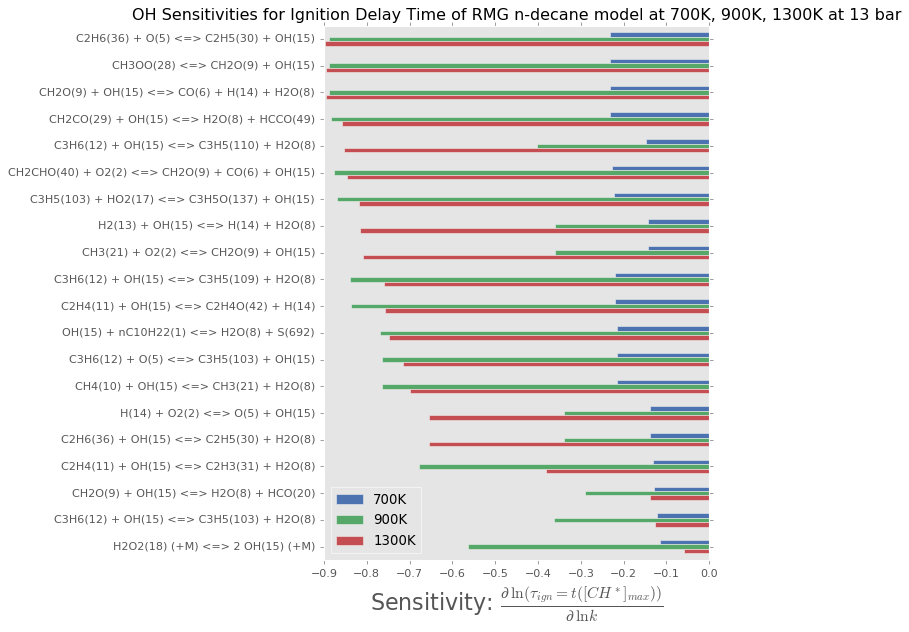

In [58]:
# Reaction mechanisms can contains thousands of elementary steps. Choose a threshold
# to see only the top few
threshold = 0.03

firstColumn = sensitivities.columns[0]
secondColumn = sensitivities.columns[1]
thirdColumn = sensitivities.columns[2]


# For plotting, collect only those steps that are above the threshold
# Otherwise, the y-axis gets crowded and illegible

for subset in sensitivities.columns:
    sensitivitiesSubset = sensitivities[sensitivities[subset].abs() > threshold]
    indicesMeetingThreshold = sensitivitiesSubset[subset].abs().sort_values(ascending=False).index 
sensitivitiesSubset.loc[indicesMeetingThreshold].plot.barh(title="OH Sensitivities for Ignition Delay Time of RMG n-decane model at 700K, 900K, 1300K at 13 bar",
                                                          legend=True)
plt.gca().invert_yaxis()
plt.rcParams.update({'axes.labelsize': 20})
plt.xlabel(r'Sensitivity: $\frac{\partial\:\ln{(\tau_{ign}=t([CH^*]_{max}))}}{\partial\:\ln{k}}$')
plt.grid(False)
# plt.style.use('classic')
plt.legend(["700K", "900K", "1300K"], loc="best")
plt.rcParams['figure.figsize'] = [10, 8]
# plt.rcParams['figure.autolayout'] = True
# Uncomment the following to save the plot. A higher than usual resolution (dpi) helps
# plt.savefig('sensitivityPlot', dpi=300)

In [59]:
np.linspace(0.5,2,5)

array([0.5  , 0.875, 1.25 , 1.625, 2.   ])

In [52]:
high_T_initial_idt = get_ignition_delay_n2(1000/0.8333333, 50, 1, plot=True, sensitivity=True)


  gas:

       temperature            1200  K
          pressure           5e+06  Pa
           density         15.2178  kg/m^3
  mean mol. weight         30.3667  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy      9.9128e+05         3.01e+07     J
   internal energy      6.6272e+05        2.012e+07     J
           entropy          7294.2        2.215e+05     J/K
    Gibbs function     -7.7618e+06       -2.357e+08     J
 heat capacity c_p          1365.3        4.146e+04     J/K
 heat capacity c_v          1091.5        3.314e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                N2        0.77944         0.719038         -21.6949
        nC10H22(1)      0.0133673        0.0626331         -118.636
             O2(2)       0.207193         0.218329          -24.749
     [ +328 minor]          

KeyboardInterrupt: 

In [59]:
# Create a dataframe to store sensitivity-analysis data
new_sensitivities = pd.DataFrame(data=[], index=gas.reaction_equations(ranking[:20]))

In [60]:
# Create an empty column to store the sensitivities data
new_sensitivities["baseCase"] = ""

In [61]:
dk = 1e-1 #perturb the oh_sensitivities

for i, j in enumerate(ranking[:20]):
    print(gas.reaction(j))
    gas.set_multiplier(1.0+dk,j)
    print(f"Multiplying reaction {j} rate constant by {dk} in {gas.reaction(j)}")


    high_T_new_idt = get_ignition_delay_n2(1000/0.83333333, 50, 1, plot=False, sensitivity=False)
    new_sensitivities["baseCase"][i] = (high_T_new_idt - high_T_initial_idt)/(high_T_initial_idt*dk)
    
gas.set_multiplier(1.0)

H2O2(18) (+M) <=> 2 OH(15) (+M)
Multiplying reaction 21 rate constant by 0.1 in H2O2(18) (+M) <=> 2 OH(15) (+M)
Reached end time 135.96 ms in 2509 steps
At 1200.0000048 K 50 bar, ignition delay time is 0.15090578119983747 ms
Performing sensitivity at time 1.3587746286664957e-07 ms at 3229.336691020292 K, 14680608.037758565 Pa

Top 20 sensitivities (of the first 7380 considered)
0 21 IdealGasReactor_220: H2O2(18) (+M) <=> 2 OH(15) (+M) 0.00015646821000839795
1 53 IdealGasReactor_220: CH2O(9) + OH(15) <=> H2O(8) + HCO(20) -3.8227537597662145e-05
2 2469 IdealGasReactor_220: C3H6(12) + OH(15) <=> C3H5(103) + H2O(8) -3.666819511563725e-05
3 240 IdealGasReactor_220: C2H4(11) + OH(15) <=> C2H3(31) + H2O(8) -3.640110618420554e-05
4 974 IdealGasReactor_220: OH(15) + nC10H22(1) <=> H2O(8) + S(692) -2.7006537391064237e-05
5 442 IdealGasReactor_220: CH2CHO(40) + O2(2) <=> CH2O(9) + CO(6) + OH(15) 9.369325100580931e-06
6 89 IdealGasReactor_220: CH3(21) + O2(2) <=> CH2O(9) + OH(15) 8.185034942322895

Reached end time 113.38 ms in 2558 steps
At 1200.0000048 K 50 bar, ignition delay time is 0.15069650858708405 ms
Performing sensitivity at time 1.3587746286664957e-07 ms at 3229.3054995839316 K, 14680398.556259591 Pa

Top 20 sensitivities (of the first 7380 considered)
0 21 IdealGasReactor_228: H2O2(18) (+M) <=> 2 OH(15) (+M) 3.255294889931036e-05
1 53 IdealGasReactor_228: CH2O(9) + OH(15) <=> H2O(8) + HCO(20) -8.748361292913276e-06
2 2469 IdealGasReactor_228: C3H6(12) + OH(15) <=> C3H5(103) + H2O(8) -8.391506805305828e-06
3 240 IdealGasReactor_228: C2H4(11) + OH(15) <=> C2H3(31) + H2O(8) -8.33047098537376e-06
4 974 IdealGasReactor_228: OH(15) + nC10H22(1) <=> H2O(8) + S(692) -6.180439234383918e-06
5 442 IdealGasReactor_228: CH2CHO(40) + O2(2) <=> CH2O(9) + CO(6) + OH(15) 1.9492905973083897e-06
6 89 IdealGasReactor_228: CH3(21) + O2(2) <=> CH2O(9) + OH(15) 1.7028822734761568e-06
7 6006 IdealGasReactor_228: C3H6(12) + OH(15) <=> C3H5(110) + H2O(8) -1.5280253309511161e-06
8 0 IdealGasRea

Reached end time 120.41 ms in 2385 steps
At 1200.0000048 K 50 bar, ignition delay time is 0.1461671045628749 ms
Performing sensitivity at time 1.3587746286664957e-07 ms at 3229.414235499033 K, 14681128.576004958 Pa

Top 20 sensitivities (of the first 7380 considered)
0 21 IdealGasReactor_236: H2O2(18) (+M) <=> 2 OH(15) (+M) 3.2653747780898645e-05
1 53 IdealGasReactor_236: CH2O(9) + OH(15) <=> H2O(8) + HCO(20) -8.775453453947919e-06
2 2469 IdealGasReactor_236: C3H6(12) + OH(15) <=> C3H5(103) + H2O(8) -8.417493846022453e-06
3 240 IdealGasReactor_236: C2H4(11) + OH(15) <=> C2H3(31) + H2O(8) -8.35626893871818e-06
4 974 IdealGasReactor_236: OH(15) + nC10H22(1) <=> H2O(8) + S(692) -6.199578981065203e-06
5 442 IdealGasReactor_236: CH2CHO(40) + O2(2) <=> CH2O(9) + CO(6) + OH(15) 2.1508579955978755e-06
6 89 IdealGasReactor_236: CH3(21) + O2(2) <=> CH2O(9) + OH(15) 1.8789706337964706e-06
7 6006 IdealGasReactor_236: C3H6(12) + OH(15) <=> C3H5(110) + H2O(8) -1.6860329099677744e-06
8 0 IdealGasReac

Reached end time 114.86 ms in 2449 steps
At 1200.0000048 K 50 bar, ignition delay time is 0.14529690389553776 ms
Performing sensitivity at time 1.3587746286664957e-07 ms at 3229.4464199913773 K, 14681344.705089863 Pa

Top 20 sensitivities (of the first 7380 considered)
0 21 IdealGasReactor_244: H2O2(18) (+M) <=> 2 OH(15) (+M) 3.258491053795482e-05
1 53 IdealGasReactor_244: CH2O(9) + OH(15) <=> H2O(8) + HCO(20) -8.756950931582808e-06
2 2469 IdealGasReactor_244: C3H6(12) + OH(15) <=> C3H5(103) + H2O(8) -8.399746053034565e-06
3 240 IdealGasReactor_244: C2H4(11) + OH(15) <=> C2H3(31) + H2O(8) -8.338650285184935e-06
4 974 IdealGasReactor_244: OH(15) + nC10H22(1) <=> H2O(8) + S(692) -6.186507530298688e-06
5 442 IdealGasReactor_244: CH2CHO(40) + O2(2) <=> CH2O(9) + CO(6) + OH(15) 2.146323802060324e-06
6 89 IdealGasReactor_244: CH3(21) + O2(2) <=> CH2O(9) + OH(15) 1.875009588414286e-06
7 6006 IdealGasReactor_244: C3H6(12) + OH(15) <=> C3H5(110) + H2O(8) -1.6824781114735597e-06
8 0 IdealGasReac

Reached end time 123.71 ms in 2411 steps
At 1200.0000048 K 50 bar, ignition delay time is 0.14478130619645954 ms
Performing sensitivity at time 1.3587746286664957e-07 ms at 3229.479274867433 K, 14681565.330758013 Pa

Top 20 sensitivities (of the first 7380 considered)
0 21 IdealGasReactor_252: H2O2(18) (+M) <=> 2 OH(15) (+M) 3.2269121337807165e-05
1 53 IdealGasReactor_252: CH2O(9) + OH(15) <=> H2O(8) + HCO(20) -8.672084937243803e-06
2 2469 IdealGasReactor_252: C3H6(12) + OH(15) <=> C3H5(103) + H2O(8) -8.318341815726435e-06
3 240 IdealGasReactor_252: C2H4(11) + OH(15) <=> C2H3(31) + H2O(8) -8.257838383771226e-06
4 974 IdealGasReactor_252: OH(15) + nC10H22(1) <=> H2O(8) + S(692) -6.126552411285894e-06
5 442 IdealGasReactor_252: CH2CHO(40) + O2(2) <=> CH2O(9) + CO(6) + OH(15) 2.125523445768153e-06
6 89 IdealGasReactor_252: CH3(21) + O2(2) <=> CH2O(9) + OH(15) 1.856838365861112e-06
7 6006 IdealGasReactor_252: C3H6(12) + OH(15) <=> C3H5(110) + H2O(8) -1.666173254094282e-06
8 0 IdealGasReact

In [66]:
sensitivities

,baseCase,reactionMatch
OH(15) + nC10H22(1) <=> H2O(8) + S(692),-0.104831,False
S(1039) <=> OH(15) + S(1404),-0.0754535,False
OH(15) + S(1032) <=> S(1043),-0.141181,False
OH(15) + S(1299) <=> S(1306),-0.223057,False
CH2O(9) + OH(15) <=> H2O(8) + HCO(20),-0.233446,False
CH3OO(28) + OH(15) <=> CH3OH(23) + O2(2),-0.173187,False
OH(15) + S(15476) <=> S(30358),-0.168271,False
CH2CHO(40) + O2(2) <=> CH2O(9) + CO(6) + OH(15),-0.184474,False
S(449) <=> OH(15) + S(459),-0.191374,False
OH(15) + S(6216) <=> S(6223),-0.200971,False


Text(0.5, 0, 'Sensitivity: $\\frac{\\partial\\:\\ln{(\\tau_{ign}=t([CH^*]_{max}))}}{\\partial\\:\\ln{k}}$')

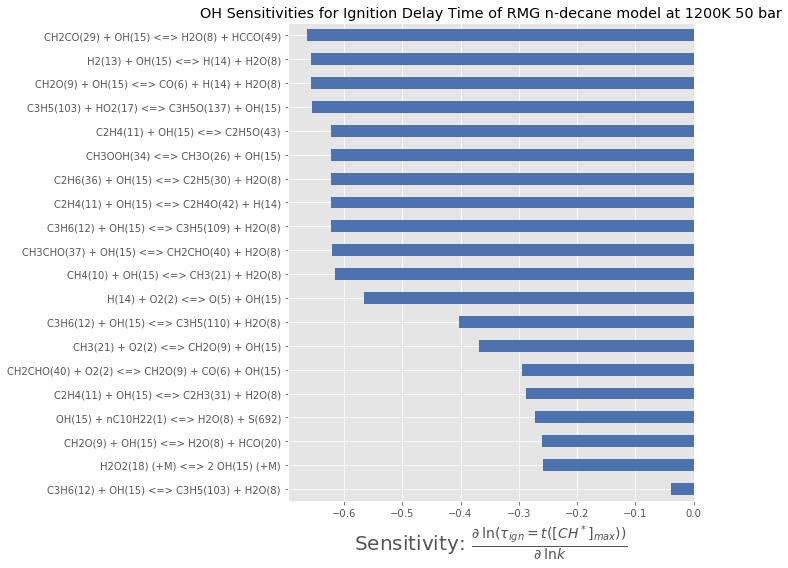

In [67]:
# Reaction mechanisms can contains thousands of elementary steps. Choose a threshold
# to see only the top few
threshold = 0.03

firstColumn = new_sensitivities.columns[0]

# For plotting, collect only those steps that are above the threshold
# Otherwise, the y-axis gets crowded and illegible
new_sensitivitiesSubset = new_sensitivities[new_sensitivities[firstColumn].abs() > threshold]
indicesMeetingThreshold = new_sensitivitiesSubset[firstColumn].abs().sort_values(ascending=False).index
new_sensitivitiesSubset.loc[indicesMeetingThreshold].plot.barh(title="OH Sensitivities for Ignition Delay Time of RMG n-decane model at 1200K 50 bar",
                                                          legend=None)
plt.gca().invert_yaxis()

plt.rcParams.update({'axes.labelsize': 20})
plt.xlabel(r'Sensitivity: $\frac{\partial\:\ln{(\tau_{ign}=t([CH^*]_{max}))}}{\partial\:\ln{k}}$')


# Uncomment the following to save the plot. A higher than usual resolution (dpi) helps
# plt.savefig('sensitivityPlot', dpi=300)

In [68]:
sensitivities['reactionMatch'] = np.where(sensitivities.index == new_sensitivities.index, 'True', 'False')

print(sensitivities)

                                                  baseCase reactionMatch
OH(15) + nC10H22(1) <=> H2O(8) + S(692)          -0.104831         False
S(1039) <=> OH(15) + S(1404)                    -0.0754535         False
OH(15) + S(1032) <=> S(1043)                     -0.141181         False
OH(15) + S(1299) <=> S(1306)                     -0.223057         False
CH2O(9) + OH(15) <=> H2O(8) + HCO(20)            -0.233446         False
CH3OO(28) + OH(15) <=> CH3OH(23) + O2(2)         -0.173187         False
OH(15) + S(15476) <=> S(30358)                   -0.168271         False
CH2CHO(40) + O2(2) <=> CH2O(9) + CO(6) + OH(15)  -0.184474         False
S(449) <=> OH(15) + S(459)                       -0.191374         False
OH(15) + S(6216) <=> S(6223)                     -0.200971         False
CH3CHO(37) + OH(15) <=> CH2CHO(40) + H2O(8)      -0.243211         False
OH(15) + S(1075) <=> S(1083)                     -0.327701         False
CH3CHO(37) + OH(15) <=> CH3CO(57) + H2O(8)       -0

In [69]:
print(sensitivities.isin(new_sensitivities))

                                                 baseCase  reactionMatch
OH(15) + nC10H22(1) <=> H2O(8) + S(692)             False          False
S(1039) <=> OH(15) + S(1404)                        False          False
OH(15) + S(1032) <=> S(1043)                        False          False
OH(15) + S(1299) <=> S(1306)                        False          False
CH2O(9) + OH(15) <=> H2O(8) + HCO(20)               False          False
CH3OO(28) + OH(15) <=> CH3OH(23) + O2(2)            False          False
OH(15) + S(15476) <=> S(30358)                      False          False
CH2CHO(40) + O2(2) <=> CH2O(9) + CO(6) + OH(15)     False          False
S(449) <=> OH(15) + S(459)                          False          False
OH(15) + S(6216) <=> S(6223)                        False          False
CH3CHO(37) + OH(15) <=> CH2CHO(40) + H2O(8)         False          False
OH(15) + S(1075) <=> S(1083)                        False          False
CH3CHO(37) + OH(15) <=> CH3CO(57) + H2O(8)         

In [32]:
gas()
gas.TPX = 1500, 13*ct.one_atm, 'nc10H22(1):1.0, O2(2):1.0, N2:3.76'
print(np.nonzero(np.isnan(gas.forward_rate_constants)))


  gas:

       temperature         1301.26  K
          pressure     1.47428e+06  Pa
           density         3.95663  kg/m^3
  mean mol. weight         29.0364  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy      1.0353e+06        3.006e+07     J
   internal energy      6.6272e+05        1.924e+07     J
           entropy          8004.4        2.324e+05     J/K
    Gibbs function     -9.3804e+06       -2.724e+08     J
 heat capacity c_p          1369.1        3.975e+04     J/K
 heat capacity c_v          1082.8        3.144e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                N2       0.745294         0.719038         -23.1933
        nC10H22(1)     0.00248002        0.0121526         -122.938
             O2(2)       0.180523         0.198941         -26.3543
             CH(3)    3.4630

In [74]:
def get_ignition_delay(gas, temperature, pressure_bar, mole_fractions, plot=False):
    """
    A general function to find the ignition delay.
    Using C2H + O --> CH* as the indication of ignition
    
    gas is a cantera Solution object
    temperature in K
    pressure_bar is in bar
    mole_fractions is a dict
    
    sensitivity is Boolean, whether to run sensitivity analysis
    """
    gas.TPX = temperature, pressure_bar*1e5, mole_fractions

    reactor = ct.IdealGasReactor(gas)
    reactor_network = ct.ReactorNet([reactor])
    
    time = 0.0
    end_time = 10e-3
    
    times = []
    concentrations = []
    pressures = []
    temperatures = []

    # set the tolerances for the solution and for the sensitivity coefficients
    reactor_network.rtol = 1.0e-6
    reactor_network.atol = 1.0e-16
    
            
    
    while time < end_time:
        time = reactor_network.time
        times.append(time)
        temperatures.append(reactor.T)
        pressures.append(reactor.thermo.P)
        concentrations.append(reactor.thermo.concentrations)
        
        # take a timestep
        # the size of the step will be determined by the ODE solver
        # depending on how quickly things are changing.
        reactor_network.step()
        

        
    print("Reached end time {0:.2f} ms in {1} steps".format(times[-1]*1e3, len(times)))
    # convert the lists into arrays
    concentrations = np.array(concentrations)
    times = np.array(times)
    pressures = np.array(pressures)
    temperatures = np.array(temperatures)

    if plot:
        plt.subplot(2,1,1)
        plt.plot(times*1e3, pressures/1e5)
        plt.ylabel("Pressure (bar)", color='b')
        ax2 = plt.gca().twinx()
        ax2.set_ylabel('Temperature (K)', color='r')
        ax2.plot(times*1e3, temperatures, 'r')
    # Using C2H + O --> CH* as the indication of ignition
    i_c2h = gas.species_index(species_names['C2H'])   
    i_o = gas.species_index(species_names['O'])
    excited_ch_generation = concentrations[:,i_o] * concentrations[:,i_c2h]
    if plot:
        plt.subplot(2,1,2)
        plt.plot(times*1e3, excited_ch_generation, 'g')
        plt.ylabel("CH* emission")
        plt.ylim(0,max(1e-13,1.1*max(excited_ch_generation)))
        plt.xlabel("Time (ms)")
        plt.tight_layout()
        plt.show()
    step_with_highest_ch_gen = excited_ch_generation.argmax()
        
    if step_with_highest_ch_gen > 1 and excited_ch_generation.max()>1e-20:
        ignition_time_ms = 1e3 * times[step_with_highest_ch_gen]
        print("At {0} K {1} bar, ignition delay time is {2} ms".format(temperature, pressure_bar, ignition_time_ms))
    else:
        print("At {0} K {1} bar, no ignition detected".format(temperature, pressure_bar))
        ignition_time_ms = np.infty
    
    
    return ignition_time_ms

In [75]:
def get_ignition_delay_n2(temperature, pressure_bar, phi, plot=False):
    """
    The paper comparison comes from Pfahl et al and Zhukov et al. --> DOI: 10.1016/j.combustflame.2007.09.006 
    Autoignition of n_Decane at high pressure and self-ignition of diesel relevant hydro-carbon-ar mixtures under 
    engine relevant conditions; compared n-decane mechanisms to shock tube experiments of Zhukov and Pfahl respectively. 
    nc10 in air mixtures between phi = [0.5 1.0 2.0] for pressures at 13 and 50 bar
    Ignition delay time condition is at P = 13 - 50 bar between 666 - 1450 K
    """
    
    gas.TP = temperature, pressure_bar*1e5
    
    gas.set_equivalence_ratio(phi=phi, fuel = species_names['nc10'], 
                              oxidizer = {species_names['O2']:0.21,
                                      species_names['N2']:0.79})
                              
    mole_fractions = gas.X
                              
    if plot:
        gas()
        
    time = get_ignition_delay(gas, temperature, pressure_bar, mole_fractions, plot=plot)

    return time
    

In [76]:
from collections import defaultdict

RMG_temperatures_dkm = 1000/np.linspace(0.65,1.6,15)
pressures_bar = [5, 11, 40]
phi =  1.0
# gas.set_multiplier(1.0+dk)

RMG_results = dict()
RMG_results = defaultdict(int)

for P in pressures_bar:
    ignition_delay_times = np.zeros_like(RMG_temperatures_dkm)
    for i, T in enumerate(RMG_temperatures_dkm):
        ignition_delay_times[i] = get_ignition_delay_n2(T,P,phi,plot=False)#,sensitivity=False)
        RMG_results.setdefault(P, []).append(ignition_delay_times[i])
#     plt.semilogy(1000/RMG_temperatures_dkm, ignition_delay_times, 'o-', label='{0}'.format(P))


Reached end time 25.23 ms in 1789 steps
At 1538.4615384615383 K 5 bar, ignition delay time is 0.017892044912766487 ms
Reached end time 21.90 ms in 2221 steps
At 1393.0348258706467 K 5 bar, ignition delay time is 0.09414728164210416 ms
Reached end time 10.10 ms in 2331 steps
At 1272.7272727272725 K 5 bar, ignition delay time is 0.40719385402575886 ms
Reached end time 26.63 ms in 2484 steps
At 1171.5481171548115 K 5 bar, ignition delay time is 1.5636307998311243 ms
Reached end time 10.20 ms in 2727 steps
At 1085.2713178294573 K 5 bar, ignition delay time is 6.828731644976398 ms
Reached end time 10.00 ms in 456 steps
At 1010.8303249097472 K 5 bar, no ignition detected
Reached end time 10.11 ms in 400 steps
At 945.9459459459459 K 5 bar, no ignition detected
Reached end time 10.01 ms in 619 steps
At 888.8888888888889 K 5 bar, no ignition detected
Reached end time 10.15 ms in 900 steps
At 838.323353293413 K 5 bar, no ignition detected
Reached end time 10.08 ms in 1014 steps
At 793.2011331444

In [77]:
AST = """0.856581277	0.639718039
0.867855898	0.753885373
0.886212008	1.168421133
0.903079332	1.200429973
0.928438866	1.667026067
"""

temp1 = []
idt1 = []

for line1 in AST.splitlines():
    temps1, times1 = line1.split()
    temp1.append(float(temps1))
    idt1.append(float(times1))
    
temp1 = np.array(temp1)
idt1 = np.array(idt1)


Olchanski = """0.649302771	0.018466231
0.650760888	0.023958468
0.666217491	0.02395001
0.681727065	0.031063263
0.681791189	0.042574661
0.694498836	0.057541014
0.718369585	0.052969566
0.726839491	0.064161679
0.711433072	0.082143162
0.731088384	0.075624434
0.731144144	0.099473913
0.752235269	0.106478487
0.75368781	0.134411967
0.790285722	0.184068564
0.791746628	0.242110013
0.812876785	0.313977382
0.828377995	0.390825307
0.835434392	0.454348254
0.839683285	0.535519493
0.865020515	0.666441476
0.879136096	0.913117663
0.886175764	0.977729706
"""

temp2 = []
idt2 = []

for line2 in Olchanski.splitlines():
    temps2, times2 = line2.split()
    temp2.append(float(temps2))
    idt2.append(float(times2))
    
temp2 = np.array(temp2)
idt2 = np.array(idt2)


Shen_11 = """0.723926044	0.038642617
0.783142898	0.103526251
0.794386852	0.104927982
0.850821295	0.322423503
0.876125069	0.340396579
0.919768225	0.513007421
0.919812833	0.638794694
0.962034116	0.8867467
0.990212305	1.283022643
"""

temp3 = []
idt3 = []

for line3 in Shen_11.splitlines():
    temps3, times3 = line3.split()
    temp3.append(float(temps3))
    idt3.append(float(times3))
    
temp3 = np.array(temp3)
idt3 = np.array(idt3)

Shen_40 = """0.787124144	0.032734898
0.860431488	0.106215646
0.87448852	0.109132424
0.882961214	0.134015633
0.926582067	0.180998551
0.970272619	0.344352757
0.999794618	0.368529783
1.029347286	0.45858253
1.020938715	0.511823205
1.050494171	0.645679858
1.075772853	0.602565904
1.08282925	0.700504195
1.113764759	0.781129227
1.203674568	0.708213594
"""

temp4 = []
idt4 = []

for line4 in Shen_40.splitlines():
    temps4, times4 = line4.split()
    temp4.append(float(temps4))
    idt4.append(float(times4))
    
temp3 = np.array(temp3)
idt3 = np.array(idt3)

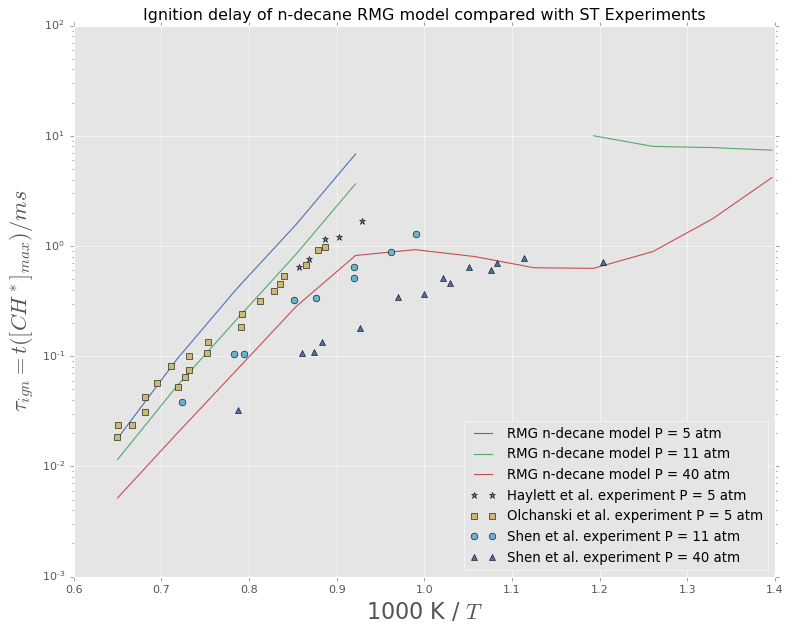

In [80]:
for P in pressures_bar:
    times = RMG_results[P]
    plt.semilogy(1000/RMG_temperatures_dkm, times, '-', label='RMG n-decane model P = {} atm'.format(P))

plt.semilogy(temp1, idt1, '*', label='Haylett et al. experiment P = {} atm'.format(pressures_bar[0]))
plt.semilogy(temp2, idt2, 's', label='Olchanski et al. experiment P = {} atm'.format(pressures_bar[0]))   
plt.semilogy(temp3, idt3, 'o', label='Shen et al. experiment P = {} atm'.format(pressures_bar[1]))
plt.semilogy(temp4, idt4, '^', label='Shen et al. experiment P = {} atm'.format(pressures_bar[2]))

plt.xlabel('1000 K / $T$')
plt.ylabel('$\\tau_{ign} = t([CH^*]_{max})/ ms$')
plt.rcParams['figure.figsize'] = [10, 8]
plt.title('Ignition delay of n-decane RMG model compared with ST Experiments')
plt.legend(loc='best')
plt.show()

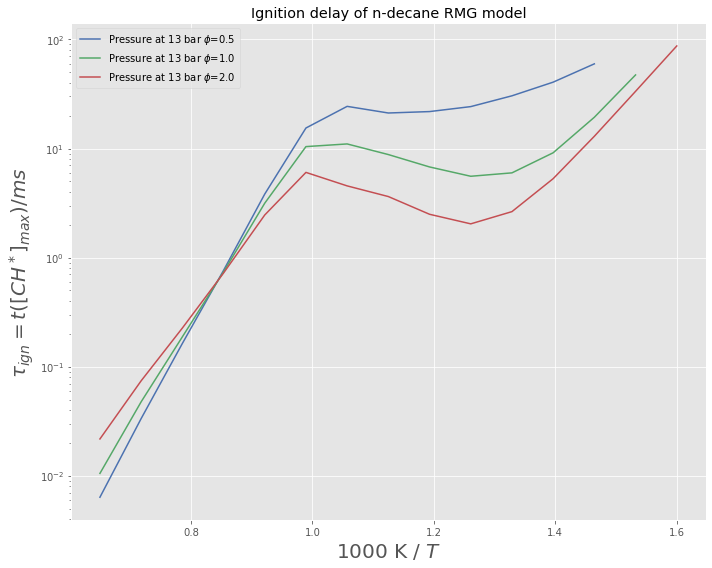

In [37]:
plt.semilogy(1000/RMG_temperatures_dkm, RMG_results[13][0.5], '-', label="Pressure at {0} bar $\phi$={1}".format(pressures_bar[0], phis[0]))
plt.semilogy(1000/RMG_temperatures_dkm, RMG_results[13][1.0], '-', label="Pressure at {0} bar $\phi$={1}".format(pressures_bar[0], phis[1]))
plt.semilogy(1000/RMG_temperatures_dkm, RMG_results[13][2.0], '-', label="Pressure at {0} bar $\phi$={1}".format(pressures_bar[0], phis[2]))
plt.xlabel('1000 K / $T$')
plt.ylabel('$\\tau_{ign} = t([CH^*]_{max})/ ms$')
plt.rcParams['figure.figsize'] = [10, 8]
plt.title('Ignition delay of n-decane RMG model')
plt.legend(loc='best')
plt.show()

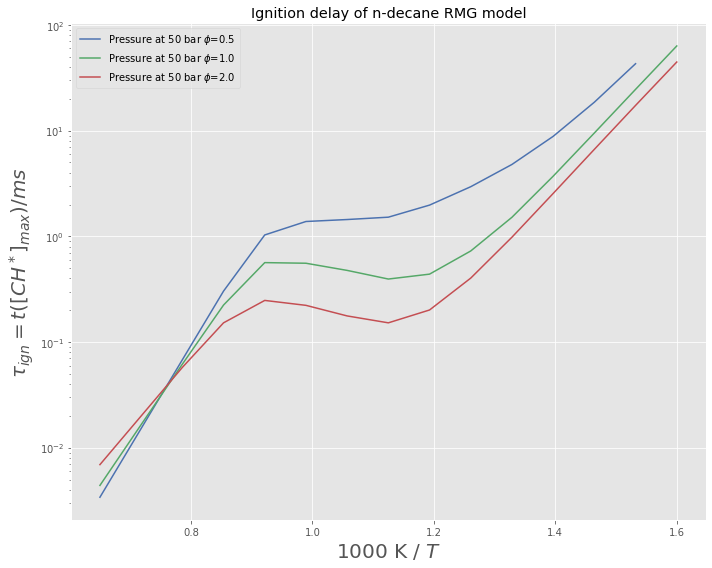

In [38]:
plt.semilogy(1000/RMG_temperatures_dkm, RMG_results[50][0.5], '-', label="Pressure at {0} bar $\phi$={1}".format(pressures_bar[1], phis[0]))
plt.semilogy(1000/RMG_temperatures_dkm, RMG_results[50][1.0], '-', label="Pressure at {0} bar $\phi$={1}".format(pressures_bar[1], phis[1]))
plt.semilogy(1000/RMG_temperatures_dkm, RMG_results[50][2.0], '-', label="Pressure at {0} bar $\phi$={1}".format(pressures_bar[1], phis[2]))
plt.xlabel('1000 K / $T$')
plt.ylabel('$\\tau_{ign} = t([CH^*]_{max})/ ms$')
plt.rcParams['figure.figsize'] = [10, 8]
plt.title('Ignition delay of n-decane RMG model')
plt.legend(loc='best')
plt.show()

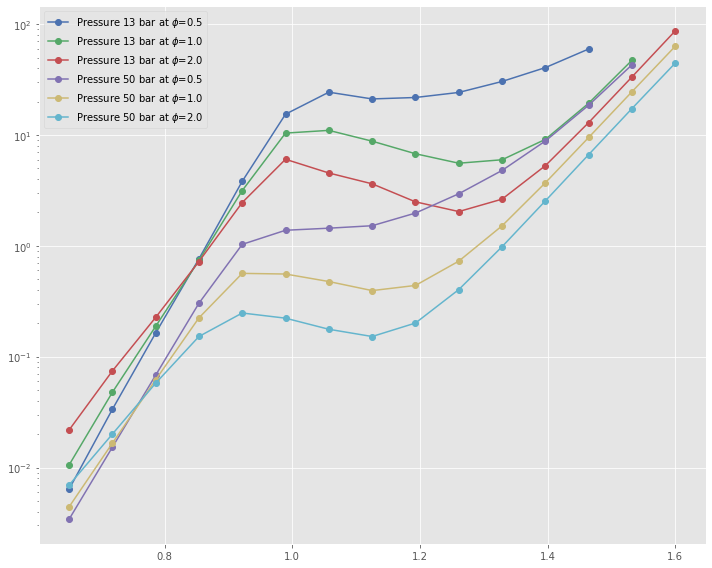

In [71]:
for P in pressures_bar:
    for phi in phis:
        news = RMG_results[P][phi]
        plt.semilogy(1000/RMG_temperatures_dkm, news, 'o-', label="Pressure {0} bar at $\phi$={1}".format(P, phi))
plt.legend(loc='best')
plt.show()



In [20]:
import pickle 


pickle_out = open('n-c10-dkm.pickle', 'wb')
pickle.dump(RMG_results, pickle_out)
pickle_out.close()

In [ ]:
# exp_nc10 = """0.659295    0.122155
# 0.679932    0.180035
# 0.686702    0.232651
# 0.691658    0.282004
# 0.697209    0.309786
# 0.715798    0.457250
# """


# ign_times = []
# temps = []


# for x in exp_nc10.splitlines():
#     temp, time = x.split()
#     ign_times.append(float(time))
#     temps.append(float(temp))
# temps = np.array(temps)
# ign_times = np.array(ign_times)

In [43]:
# extracted values of experimental ignition delay times for iso-octane in air from Pfhal et al @ 13 bar 
# using the docstrings


exp_nc10_13 = """0.771216    0.0869649
0.809216    0.191947
0.830035    0.264515
0.938927    0.785369
0.987919    1.73243
1.07350     2.82456
1.09187     3.81030
1.07099     1.92002
1.16876     2.75052
1.19687     3.05735
1.25302     2.45962
1.30917     2.11029
1.37027     2.44420
1.43262     3.43364
"""

exp_nc10_50 = """1.05546   0.338838
1.06769   0.331359
1.12629   0.239352
1.13114   0.197372
1.18007   0.218828
1.20089   0.253762
1.23270   0.269920
1.31961   0.402551
1.37116   0.884630
1.43976   1.43915
1.52559   3.90651
"""

ign_times13 = []
temps13 = []

ign_times50 = []
temps50 = []


for x in exp_nc10_13.splitlines():
    temp, time = x.split()
    ign_times13.append(float(time))
    temps13.append(float(temp))
temps13 = np.array(temps13)
ign_times13 = np.array(ign_times13)


for y in exp_nc10_50.splitlines():
    temps, times = y.split()
    ign_times50.append(float(times))
    temps50.append(float(temps))
temps50 = np.array(temps50)
ign_times50 = np.array(ign_times50)
    

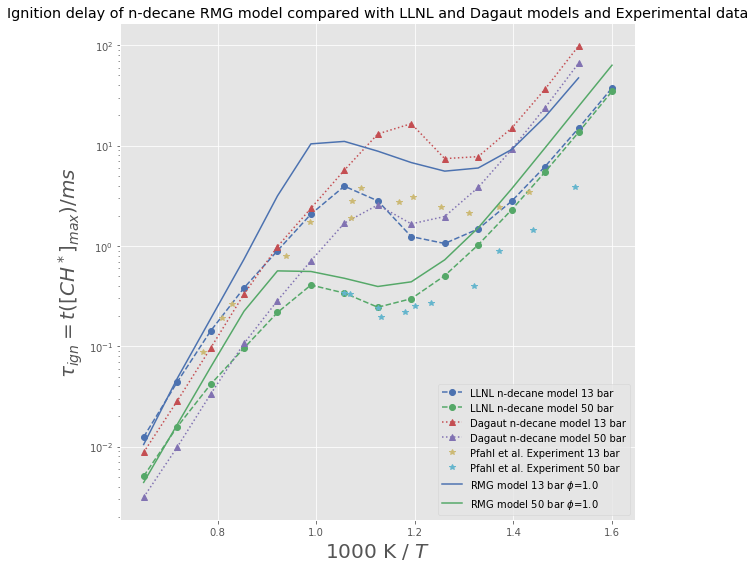

In [44]:
import pickle 


pickle_in = open('nc10-LLNL.pickle', 'rb')       
LLNL_results = pickle.load(pickle_in)

# print(LLNL_results)

Dagaut_temperatures = 1000/np.linspace(0.65,1.6,15)
LLNL_temperatures = 1000/np.linspace(0.65,1.6,15)
pickle_in_DAG = open('nc10-Dagaut.pickle', 'rb')       
DAG_results = pickle.load(pickle_in_DAG)


for key, val in LLNL_results.items():
    plt.semilogy(1000/RMG_temperatures_dkm, val, 'o--', label= 'LLNL n-decane model {} bar'.format(key))
    
    
for n_key, n_val in DAG_results.items():
    plt.semilogy(1000/Dagaut_temperatures, n_val, '^:', label= 'Dagaut n-decane model {} bar'.format(n_key))

plt.semilogy(temps13,ign_times13, '*', label='Pfahl et al. Experiment 13 bar')
plt.semilogy(temps50, ign_times50, '*', label='Pfahl et al. Experiment 50 bar')

plt.semilogy(1000/RMG_temperatures_dkm, RMG_results[13][1.0], '-', label="RMG model {0} bar $\phi$={1}".format(pressures_bar[0], phis[1]))
plt.semilogy(1000/RMG_temperatures_dkm, RMG_results[50][1.0], '-', label="RMG model {0} bar $\phi$={1}".format(pressures_bar[1], phis[1]))


plt.legend(loc='best')
plt.xlabel('1000 K / $T$')
plt.ylabel('$\\tau_{ign} = t([CH^*]_{max})/ms$')
plt.rcParams['figure.figsize'] = [10, 8]
plt.title('Ignition delay of n-decane RMG model compared with LLNL and Dagaut models and Experimental data')
plt.show()

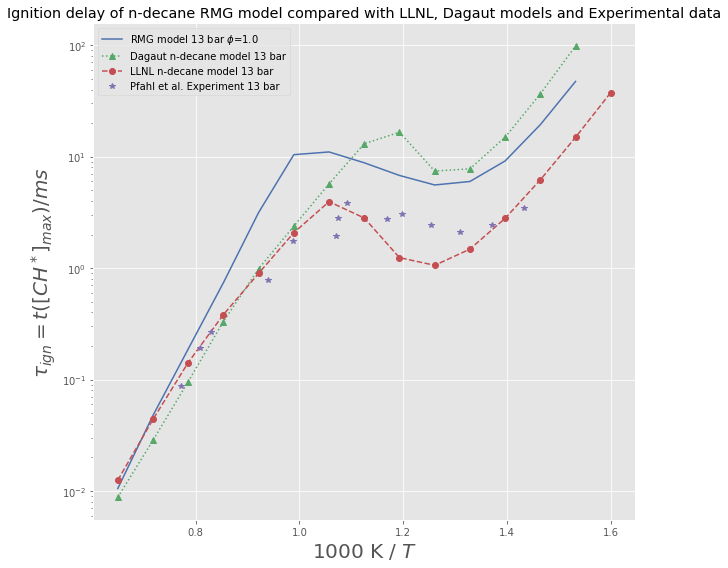

In [45]:
plt.semilogy(1000/RMG_temperatures_dkm, RMG_results[13][1.0], '-', label="RMG model {0} bar $\phi$={1}".format(pressures_bar[0], phis[1]))
plt.semilogy(1000/Dagaut_temperatures, DAG_results[13], '^:', label= 'Dagaut n-decane model {} bar'.format(pressures_bar[0]))
plt.semilogy(1000/RMG_temperatures_dkm, LLNL_results[13], 'o--', label= 'LLNL n-decane model {} bar'.format(pressures_bar[0]))
plt.semilogy(temps13,ign_times13, '*', label='Pfahl et al. Experiment 13 bar')
plt.xlabel('1000 K / $T$')
plt.ylabel('$\\tau_{ign} = t([CH^*]_{max})/ms$')
plt.rcParams['figure.figsize'] = [10, 8]
plt.title('Ignition delay of n-decane RMG model compared with LLNL, Dagaut models and Experimental data')
plt.legend(loc='best')
plt.show()

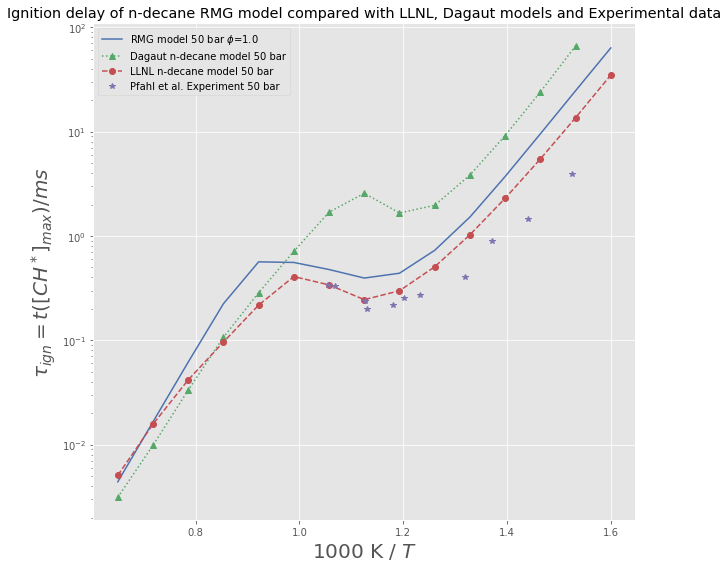

In [46]:
plt.semilogy(1000/RMG_temperatures_dkm, RMG_results[50][1.0], '-', label="RMG model {0} bar $\phi$={1}".format(pressures_bar[1], phis[1]))
plt.semilogy(1000/Dagaut_temperatures, DAG_results[50], '^:', label= 'Dagaut n-decane model {} bar'.format(pressures_bar[1]))
plt.semilogy(1000/RMG_temperatures_dkm, LLNL_results[50], 'o--', label= 'LLNL n-decane model {} bar'.format(pressures_bar[1]))
plt.semilogy(temps50, ign_times50, '*', label='Pfahl et al. Experiment 50 bar')
plt.xlabel('1000 K / $T$')
plt.ylabel('$\\tau_{ign} = t([CH^*]_{max})/ms$')
plt.rcParams['figure.figsize'] = [10, 8]
plt.title('Ignition delay of n-decane RMG model compared with LLNL, Dagaut models and Experimental data')
plt.legend(loc='best')
plt.show()

{13: array([8.78180527e-03, 2.84497280e-02, 9.58489116e-02, 3.31228534e-01,
       9.86347280e-01, 2.37571690e+00, 5.69660009e+00, 1.30690022e+01,
       1.65496983e+01, 7.42181734e+00, 7.76395052e+00, 1.49332013e+01,
       3.65628396e+01, 9.83957165e+01,            inf]), 50: array([3.13471628e-03, 9.86313353e-03, 3.33101449e-02, 1.06858735e-01,
       2.85260634e-01, 7.12291226e-01, 1.68923674e+00, 2.56475864e+00,
       1.65994500e+00, 1.96584627e+00, 3.82829180e+00, 9.14746088e+00,
       2.39400443e+01, 6.61060107e+01,            inf])}


<function matplotlib.pyplot.show(*args, **kw)>

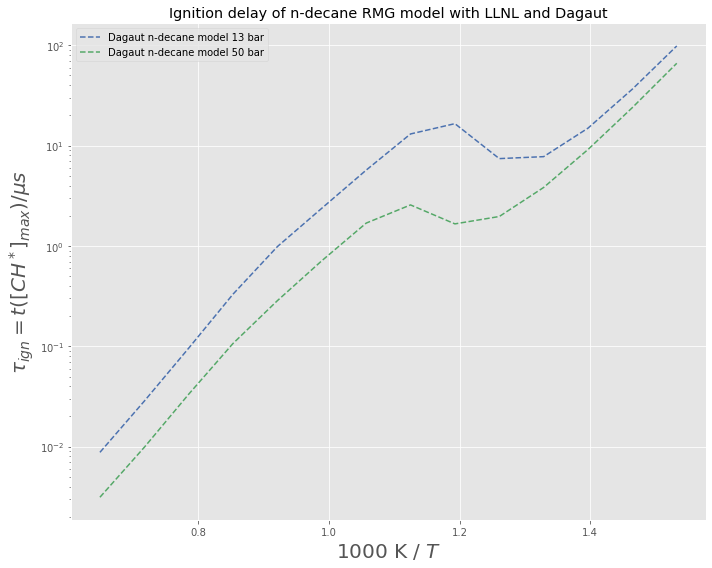

In [80]:
import pickle 

LLNL_temperatures = 1000/np.linspace(0.65,1.6,15)
pickle_in_DAG = open('nc10-Dagaut.pickle', 'rb')       
DAG_results = pickle.load(pickle_in_DAG)

print(DAG_results)

Dagaut_temperatures = 1000/np.linspace(0.65,1.6,15)
for n_key, n_val in DAG_results.items():
    plt.semilogy(1000/Dagaut_temperatures, n_val, '--', label= 'Dagaut n-decane model {} bar'.format(n_key))

    
# LLNL_temperatures = 1000/np.linspace(0.65,1.6,15)    
# for label, output in LLNL_results.items():
#     plt.semilogy(1000/LLNL_temperatures, output, 'o-', label= 'LLNL n-decane model {} bar'.format(label))    

    
# for P in pressures_bar:
#     times = RMG_results[P]
#     plt.semilogy(1000/RMG_temperatures_dkm,times,label=' RMG new model {} bar'.format(P))
    
plt.legend(loc='best')
plt.xlabel('1000 K / $T$')
plt.ylabel('$\\tau_{ign} = t([CH^*]_{max})/\mu s$')
plt.rcParams['figure.figsize'] = [10, 8]
plt.title('Ignition delay of n-decane RMG model with LLNL and Dagaut')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

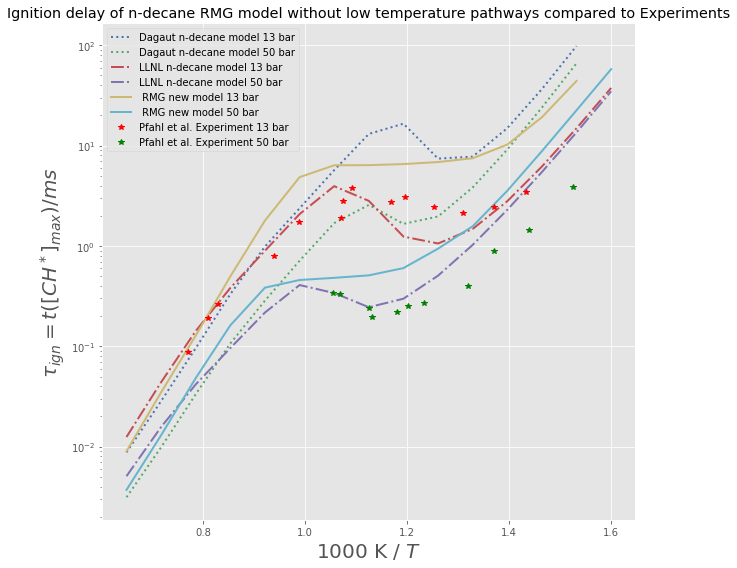

In [71]:


#plt.semilogy(temps, ign_times, 'g*', label='DC. Horning Experiment 1 atm')    


    
# for key, val in Zeng_results.items():
#     plt.semilogy(1000/RMG_temperatures_dkm, val, 'k--o', label= 'Zeng model {} bar'.format(key))
    
for n_key, n_val in DAG_results.items():
    plt.semilogy(1000/RMG_temperatures_dkm, n_val, ':', linewidth=2.0, label= 'Dagaut n-decane model {} bar'.format(n_key))
    
    
for label, output in LLNL_results.items():
    plt.semilogy(1000/RMG_temperatures_dkm, output, '-.',linewidth=2.0, label= 'LLNL n-decane model {} bar'.format(label))    

    
for P in pressures_bar:
    times = RMG_results[P]
    
    plt.semilogy(1000/RMG_temperatures_dkm,times,'-',linewidth=2.0, label=' RMG new model {} bar'.format(P))    
    
    
    
plt.semilogy(temps13,ign_times13, 'r*', label='Pfahl et al. Experiment 13 bar')
plt.semilogy(temps50, ign_times50, 'g*', label='Pfahl et al. Experiment 50 bar')




plt.legend(loc='best')
plt.xlabel('1000 K / $T$')
plt.ylabel('$\\tau_{ign} = t([CH^*]_{max})/ms$')
plt.rcParams['figure.figsize'] = [10, 8]
plt.title('Ignition delay of n-decane RMG model without low temperature pathways compared to Experiments')
plt.show

In [ ]:





# # #plt.semilogy(temps, ign_times, 'g*', label='DC. Horning Experiment 1 atm')

# plt.semilogy(1000/RMG_temperatures_dkm,times,label=' RMG model {} bar'.format(P))
# plt.legend(loc='best')
# plt.xlabel('1000 K / $T$')
# plt.ylabel('$\\tau_{ign} = t([CH^*]_{max})/\mu s$')
# plt.rcParams['figure.figsize'] = [10, 8]
# plt.title('Ignition delay of n-decane detailed kinetic model compared to reduced model compared to ST experiment')
# plt.show


    


In [ ]:
# plt.semilogy(temps,ign_times, 'r*', label='DC Horning Experiment 1 atm')
# plt.semilogy(1000/RMG_temperatures, times, 'o-', label='RMG model {0} atm'.format(pressures_bar))
    
# plt.legend(loc='best')
# plt.xlabel("1000 K / temperature")
# #plt.xlim(0.6,0.8)
# plt.ylabel("Ignition delay time $\\tau$ (ms)")
# plt.title('RMG model of Ignition delay of n-Decane at $\phi$=1.0')
# plt.show()   
# plt.rcParams['figure.figsize'] = [10, 8]

<function matplotlib.pyplot.show(*args, **kw)>

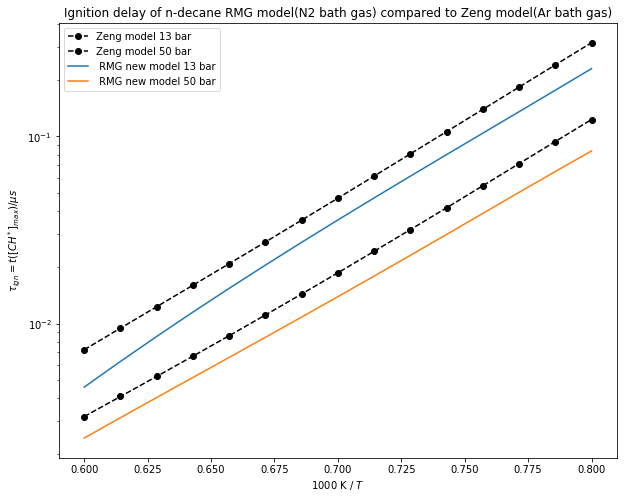

In [37]:
for key, val in Zeng_results.items():
    plt.semilogy(1000/RMG_temperatures_dkm, val, 'k--o', label= 'Zeng model {} bar'.format(key))
    


    
for P in pressures_bar:
    times = RMG_results[P]
    
    plt.semilogy(1000/RMG_temperatures_dkm,times,label=' RMG new model {} bar'.format(P))  
    
    
plt.legend(loc='best')
plt.xlabel('1000 K / $T$')
plt.ylabel('$\\tau_{ign} = t([CH^*]_{max})/\mu s$')
plt.rcParams['figure.figsize'] = [10, 8]
plt.title('Ignition delay of n-decane RMG model(N2 bath gas) compared to Zeng model(Ar bath gas)')
plt.show    